<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Datasets

In [7]:
df = pd.read_csv('gold_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
df.drop(columns='Date', axis=1, inplace=True)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#Correaltion

In [20]:
df.corr()['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

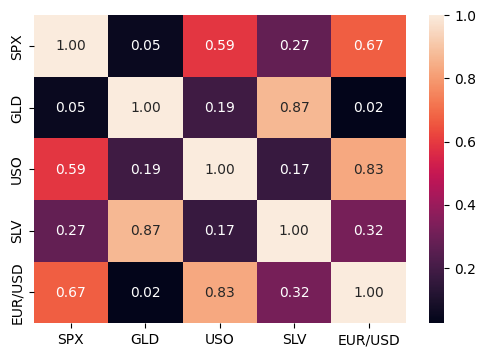

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr().abs(), annot=True, fmt='0.2f')
plt.show()

#Data Visualization

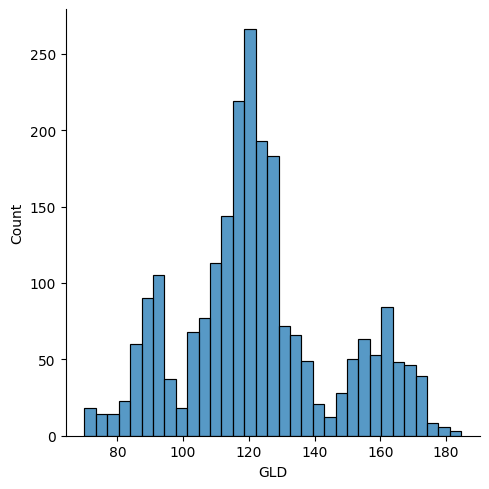

In [29]:
#Checking the distribution of GLD
sns.displot(df['GLD'])

In [32]:
x = df.drop(columns='GLD', axis=1)
y = df['GLD']

#Normalize the data

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

#Train/Test datasets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

#Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = lr_model.predict(x_test)

In [48]:
score = r2_score(y_test, y_pred)
score

0.886624633296117

#Randomforest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = rf_model.predict(x_test)

In [52]:
score = r2_score(y_test, y_pred)
score

0.9871641025991889